# PROGRAMMING ASSIGNMENT 1

#### Let's start by importing some important libraries that we are going to use later
If there are any other libraries that you use in your assignment, please import them here as well.

In [1]:
import networkx as nx
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Mounting the drive
If you are working on google collab instead of jupyter notebook, you will need to uncomment the following cell to mount your drive so that you can read your files. If you are not working on google collab, you do not need to change anything.

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

### Getting the locations
We will be reading the locations.csv file to get create a dictionary where the keys will be the node indices and the values will be tuples with x and y co-ordinates. The code for is given but you will be expected to write such codes yourselves in the future parts and assignments.

In [3]:
# inititliazing the dictionary
locations = dict()

# you might have to change this depending on your directory
path = "locations.csv"
with open(path, 'r') as f:
    csvr = csv.reader(f)
    next(csvr, None) # to skip the header row
    for row in csvr:
        # adding to the dictionary
        locations[int(row[-1])] = (float(row[0]), float(row[1])) # int() and float() are used to changed the strings to numerical values        

### Visualizing the lcoations on a graph
We are now going to to use truncated_paths.csv_ to see how our edges and nodes look. Again, the code is given below this time but you will be expected to write similar codes in future parts and assignments.

In [4]:
# Initializing the graph
G = nx.Graph()

# you might have to change this depending on your directory
path = "truncated_paths.csv"
with open(path, 'r') as f:
    csvr = csv.reader(f)
    next(csvr, None) # to skip the header row
    for row in csvr:
        # print(row)
        # adding the edges in the graph based on the edges we have in the csv
        G.add_edge(int(row[0]), int(row[1]))


#### Plotting the graph

In [5]:
# plt.figure(figsize=(30, 30)) # defining the size of the image (this has been kept large on purpose to make the visualisation clear)
# nx.draw(G, pos = locations, with_labels = True , node_size = 2000)
# plt.margins(0.2)
# plt.show()

Don't worry if this graph seems overwhelming :p. The only point of visualizing this graph was to give you a better sense of how our locations are distributed and to make you familiar with the netwrokx library. Before moving on, I would strongly recommend you to play aroung with the functions given. Try changing the node sizes or try changing the colour of the nodes and see how that changes the graph. 

## Task 1 (BFS & DFS)
In this task you will be doing file reading yourself, similar to what we did to get the dictionary of locations, along with performing BFS and DFS traversals.
Here are some points to keep in mind:

--> You will have to read "truncated_paths.csv" to make the graph. You are free to use the data structure of your choice to represent our graph.
    Common structures that could prove to be easy to implement in this case are dictionaries and list of lists.

--> It can be helpful if you make different lists/queues/stacks to keep track of which nodes have been visited and which are left.

--> The 'root' variable is to represent the index of the starting/source node, which in our case is 1.


In [6]:
import queue

# BFS ALGORITHM
def BFS(graph, root): # if you want to give any extra variables as inputs, you are free to do so. However, make sure to explain what they represent and why did you need them.
    traversal = []

    current=queue.Queue()

    end=list(graph.keys())[-1]

    traversal.append(root)

    for i in graph[root]:
        current.put(i)

    while( len(traversal) != end):
        while current.empty() == False:
            node = current.get()
            if (node not in traversal):
                traversal.append(node)
                for i in graph[node]:
                    current.put(i)
        
    return traversal

# DFS ALGORITHM
def DFS(graph, root):  # if you want to give any extra variables as inputs, you are free to do so. However, make sure to explain what they represent and why did you need them.
    traversal = []

    current=[]

    end=list(graph.keys())[-1]

    traversal.append(root)

    for i in reversed(graph[root]):
        current.append(i)

    while( len(traversal) != end):
        while len(current) != 0:
            node = current.pop()
            if (node not in traversal):
                traversal.append(node)
                for i in reversed(graph[node]):
                    current.append(i)
    return traversal

In [7]:
graph=[]
with open("truncated_paths.csv", 'r') as f:
    csvr = csv.reader(f)
    next(csvr, None) # to skip the header row
    for row in csvr:
        graph.append((int(row[0]), int(row[1])))

def Convert(tup, di):
	for a, b in tup:
		di.setdefault(a, []).append(b)
	return di

dictionary = {}
graph=Convert(graph, dictionary)

root =1
print("The BFS traversal is:", BFS(graph, root))

print("The DFS traversal is:", DFS(graph, root))


The BFS traversal is: [1, 311, 176, 168, 354, 267, 350, 256, 321, 279, 113, 160, 85, 331, 88, 12, 175, 181, 158, 294, 337, 258, 132, 58, 322, 24, 211, 80, 228, 274, 296, 303, 343, 314, 308, 16, 29, 197, 344, 316, 329, 209, 72, 272, 2, 188, 346, 57, 172, 185, 361, 204, 291, 49, 128, 273, 367, 151, 293, 295, 277, 61, 62, 11, 150, 112, 226, 244, 297, 65, 103, 210, 306, 26, 180, 338, 115, 364, 250, 152, 143, 159, 229, 104, 239, 319, 235, 97, 230, 77, 31, 93, 13, 264, 326, 37, 330, 25, 231, 153, 100, 133, 3, 94, 198, 141, 349, 285, 138, 358, 307, 192, 81, 270, 46, 227, 332, 20, 266, 165, 312, 127, 201, 82, 194, 333, 134, 74, 351, 200, 174, 107, 116, 225, 208, 110, 9, 219, 5, 21, 122, 171, 142, 101, 353, 139, 360, 203, 255, 114, 259, 117, 124, 40, 187, 275, 268, 161, 86, 126, 4, 19, 220, 162, 106, 111, 45, 196, 341, 280, 121, 92, 41, 34, 22, 73, 347, 135, 278, 84, 59, 265, 32, 33, 261, 66, 71, 352, 260, 292, 317, 205, 215, 249, 305, 359, 300, 234, 178, 339, 246, 60, 78, 357, 149, 7, 356, 236

## TASK 2 (UCS)

In this part, remember that not only do you have to return the cost of reaching to the goal node(s), but also the route that is to taken to reach the goal node(s).

#### IMPORTANT POINTS:

Note that you will have to use and/or implement a *priority queue* for this part.

You are allowed to use the same graph variable that you made in the previous task.

For the cost variable, you wil read the _costs.csv_. How you read those costs will once again depend on your implementation. However, the simplest way could be to create a dictionary where the key is a tuple of source and destination nodes, and the value is the cost between the two nodes.

If for some reason, there is no path from source node to goal node, your function should return a cost of -1 and an empty list for the path.

The number of goal nodes will be dynamic so your function should cater to that.

You should also keep in mind the case where the source node is given as the goal node, in which case the cost will be zero and the path will be a list with just the source node in it.

In [8]:
# UNIFROM COST SEARCH ALGORITHM
# if you want to give any extra variables as inputs, you are free to do so. However, make sure to explain what they represent and why did you need them.
def uniform_cost_search(graph, cost, root, goals):
    total_costs, final_paths = [], []
    visited=[]
    fathers={}
    total_cost=0

    prq=queue.PriorityQueue()
    # end=list(graph.keys())[-1]
    current_path=[]
    frontier={}

    node=root

    visited.append(node)
    if(node in goals):
        final_paths.append([node])
        total_costs.append(0)


    for i in graph[node]:
        if(i not in fathers):
            fathers[i]=node
        prq.put((cost[root,i],i))
    
    while(prq.empty() == False ):
        node=prq.get()

        if(node[1] in visited):# dead end
            continue
        else:
            visited.append(node[1]) #add to visited node

            for i in graph[node[1]]: #add children to frontier if any
                if(i not in fathers):
                    fathers[i]=node[1]
                prq.put((cost[node[1],i]+node[0],i))

            if(node[1] in goals): #goal state
                patht=[]
                k=node[1]
                total_cost=0
                while(k!=root):
                    total_cost+=cost[fathers[k],k]
                    patht.append(fathers[k])
                    k=fathers[k]

                patht.reverse()

                patht.append(node[1])

                final_paths.append(patht)
                total_costs.append(float(total_cost))
    

    return total_costs, final_paths


In [9]:

cost = [] # you will have to use costs.csv for this

with open("distances.csv", 'r') as f:
    csvr = csv.reader(f)
    next(csvr, None) # to skip the header row
    for row in csvr:
        try:
            cost.append( ( ( int(row[0]), int(row[1]) ) , float(row[2]) ) )
        except:
            cost.append( ( ( int(row[0]), int(row[1]) ) , row[2] ) )
def Convert(tup, di):
	for a, b in tup:
		di[a]=b
	return di

dictionary = {}
cost=Convert(cost, dictionary)

root = 1
goals = list([315,232,212,203]) #Your function should work for a dynamic number of goal nodes.

total_costs, final_paths = uniform_cost_search(graph, cost, root, goals)

for i in range(len(goals)):
    print(f'Total cost for goal node: {final_paths[i][len(final_paths[i])-1]} is {total_costs[i]} and the path for this cost is: {final_paths[i]}')


Total cost for goal node: 232 is 9129.5311537 and the path for this cost is: [1, 24, 21, 232]
Total cost for goal node: 203 is 11292.7306829 and the path for this cost is: [1, 168, 209, 236, 203]
Total cost for goal node: 212 is 14320.336197 and the path for this cost is: [1, 168, 197, 66, 212]
Total cost for goal node: 315 is 20025.341298 and the path for this cost is: [1, 24, 349, 315]


## TASK 3 (Visualizing the paths)
Now that you have paths for goals, let's visualize them using the netwrokx library that we saw earlier. Choose one goal node from the above cell and based on that goal node, plot two graphs:
1. Draw a graph similar to the one we saw at the start of the assignment. However, this time, the colour of the nodes that are traversed to get to the goal node should be red, while the others should be blue.
2. Draw a graph that only shows the nodes and edges needed to get from the root (source) node to the goal node.  

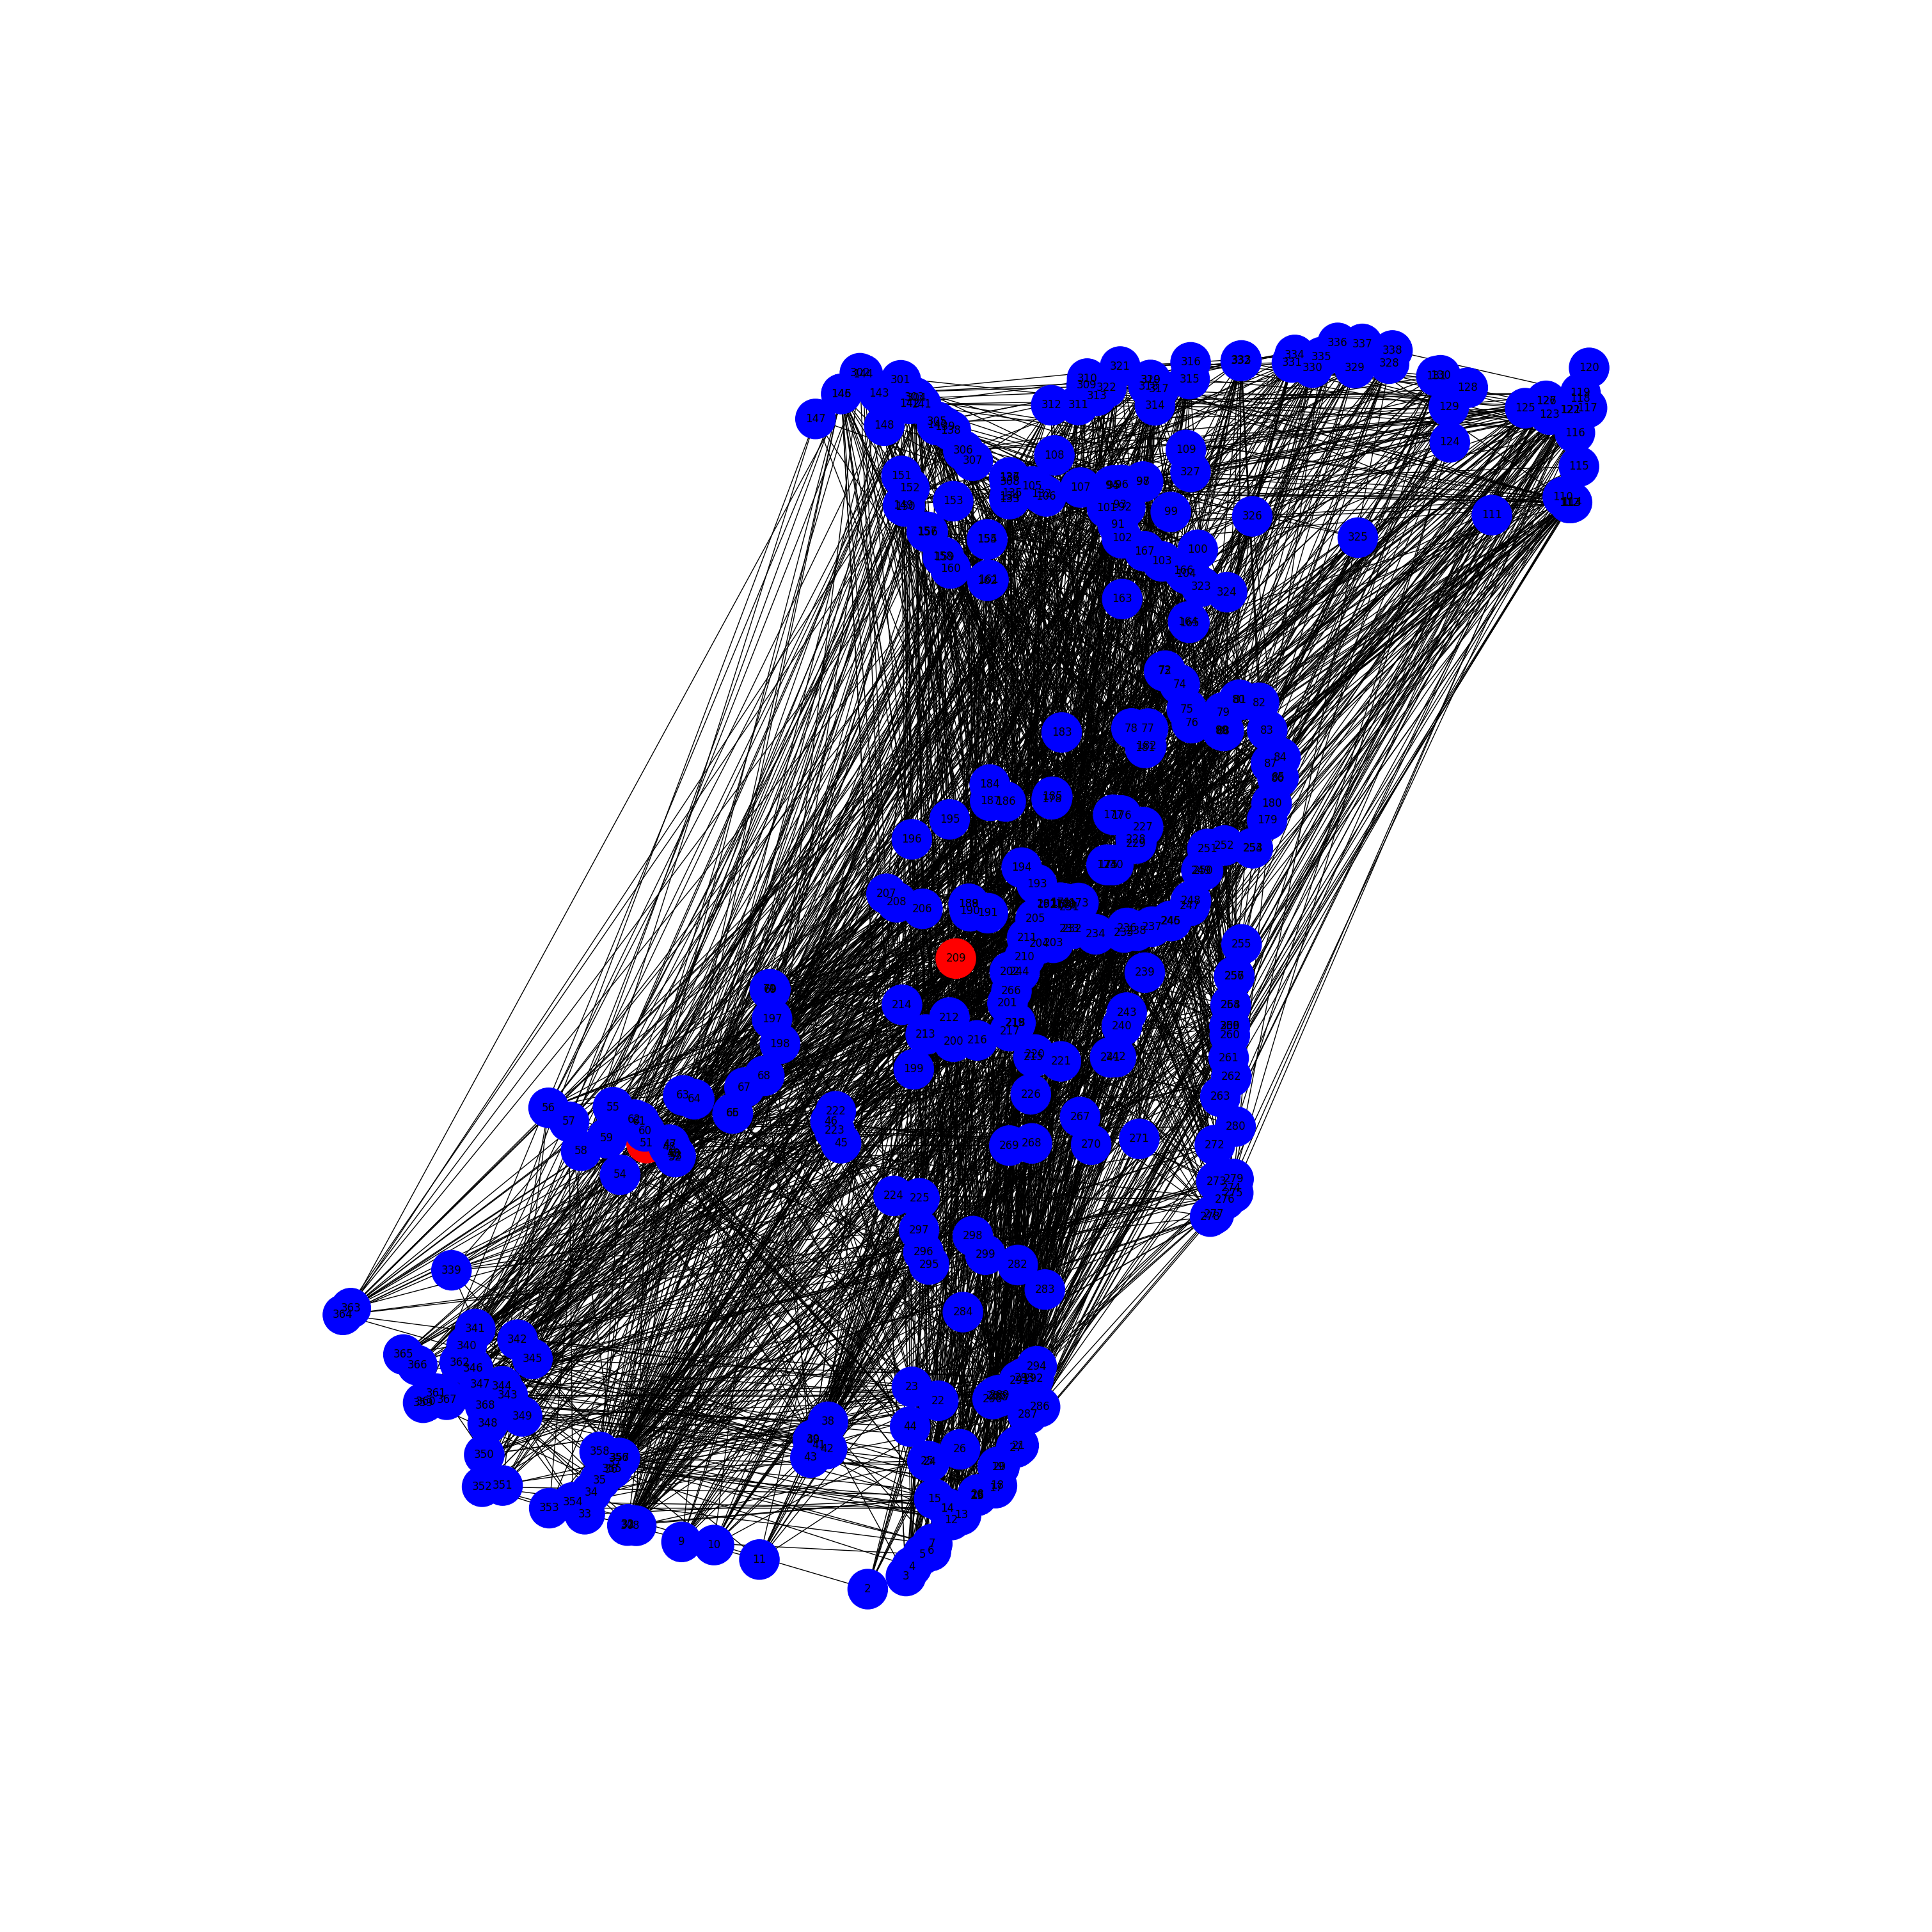

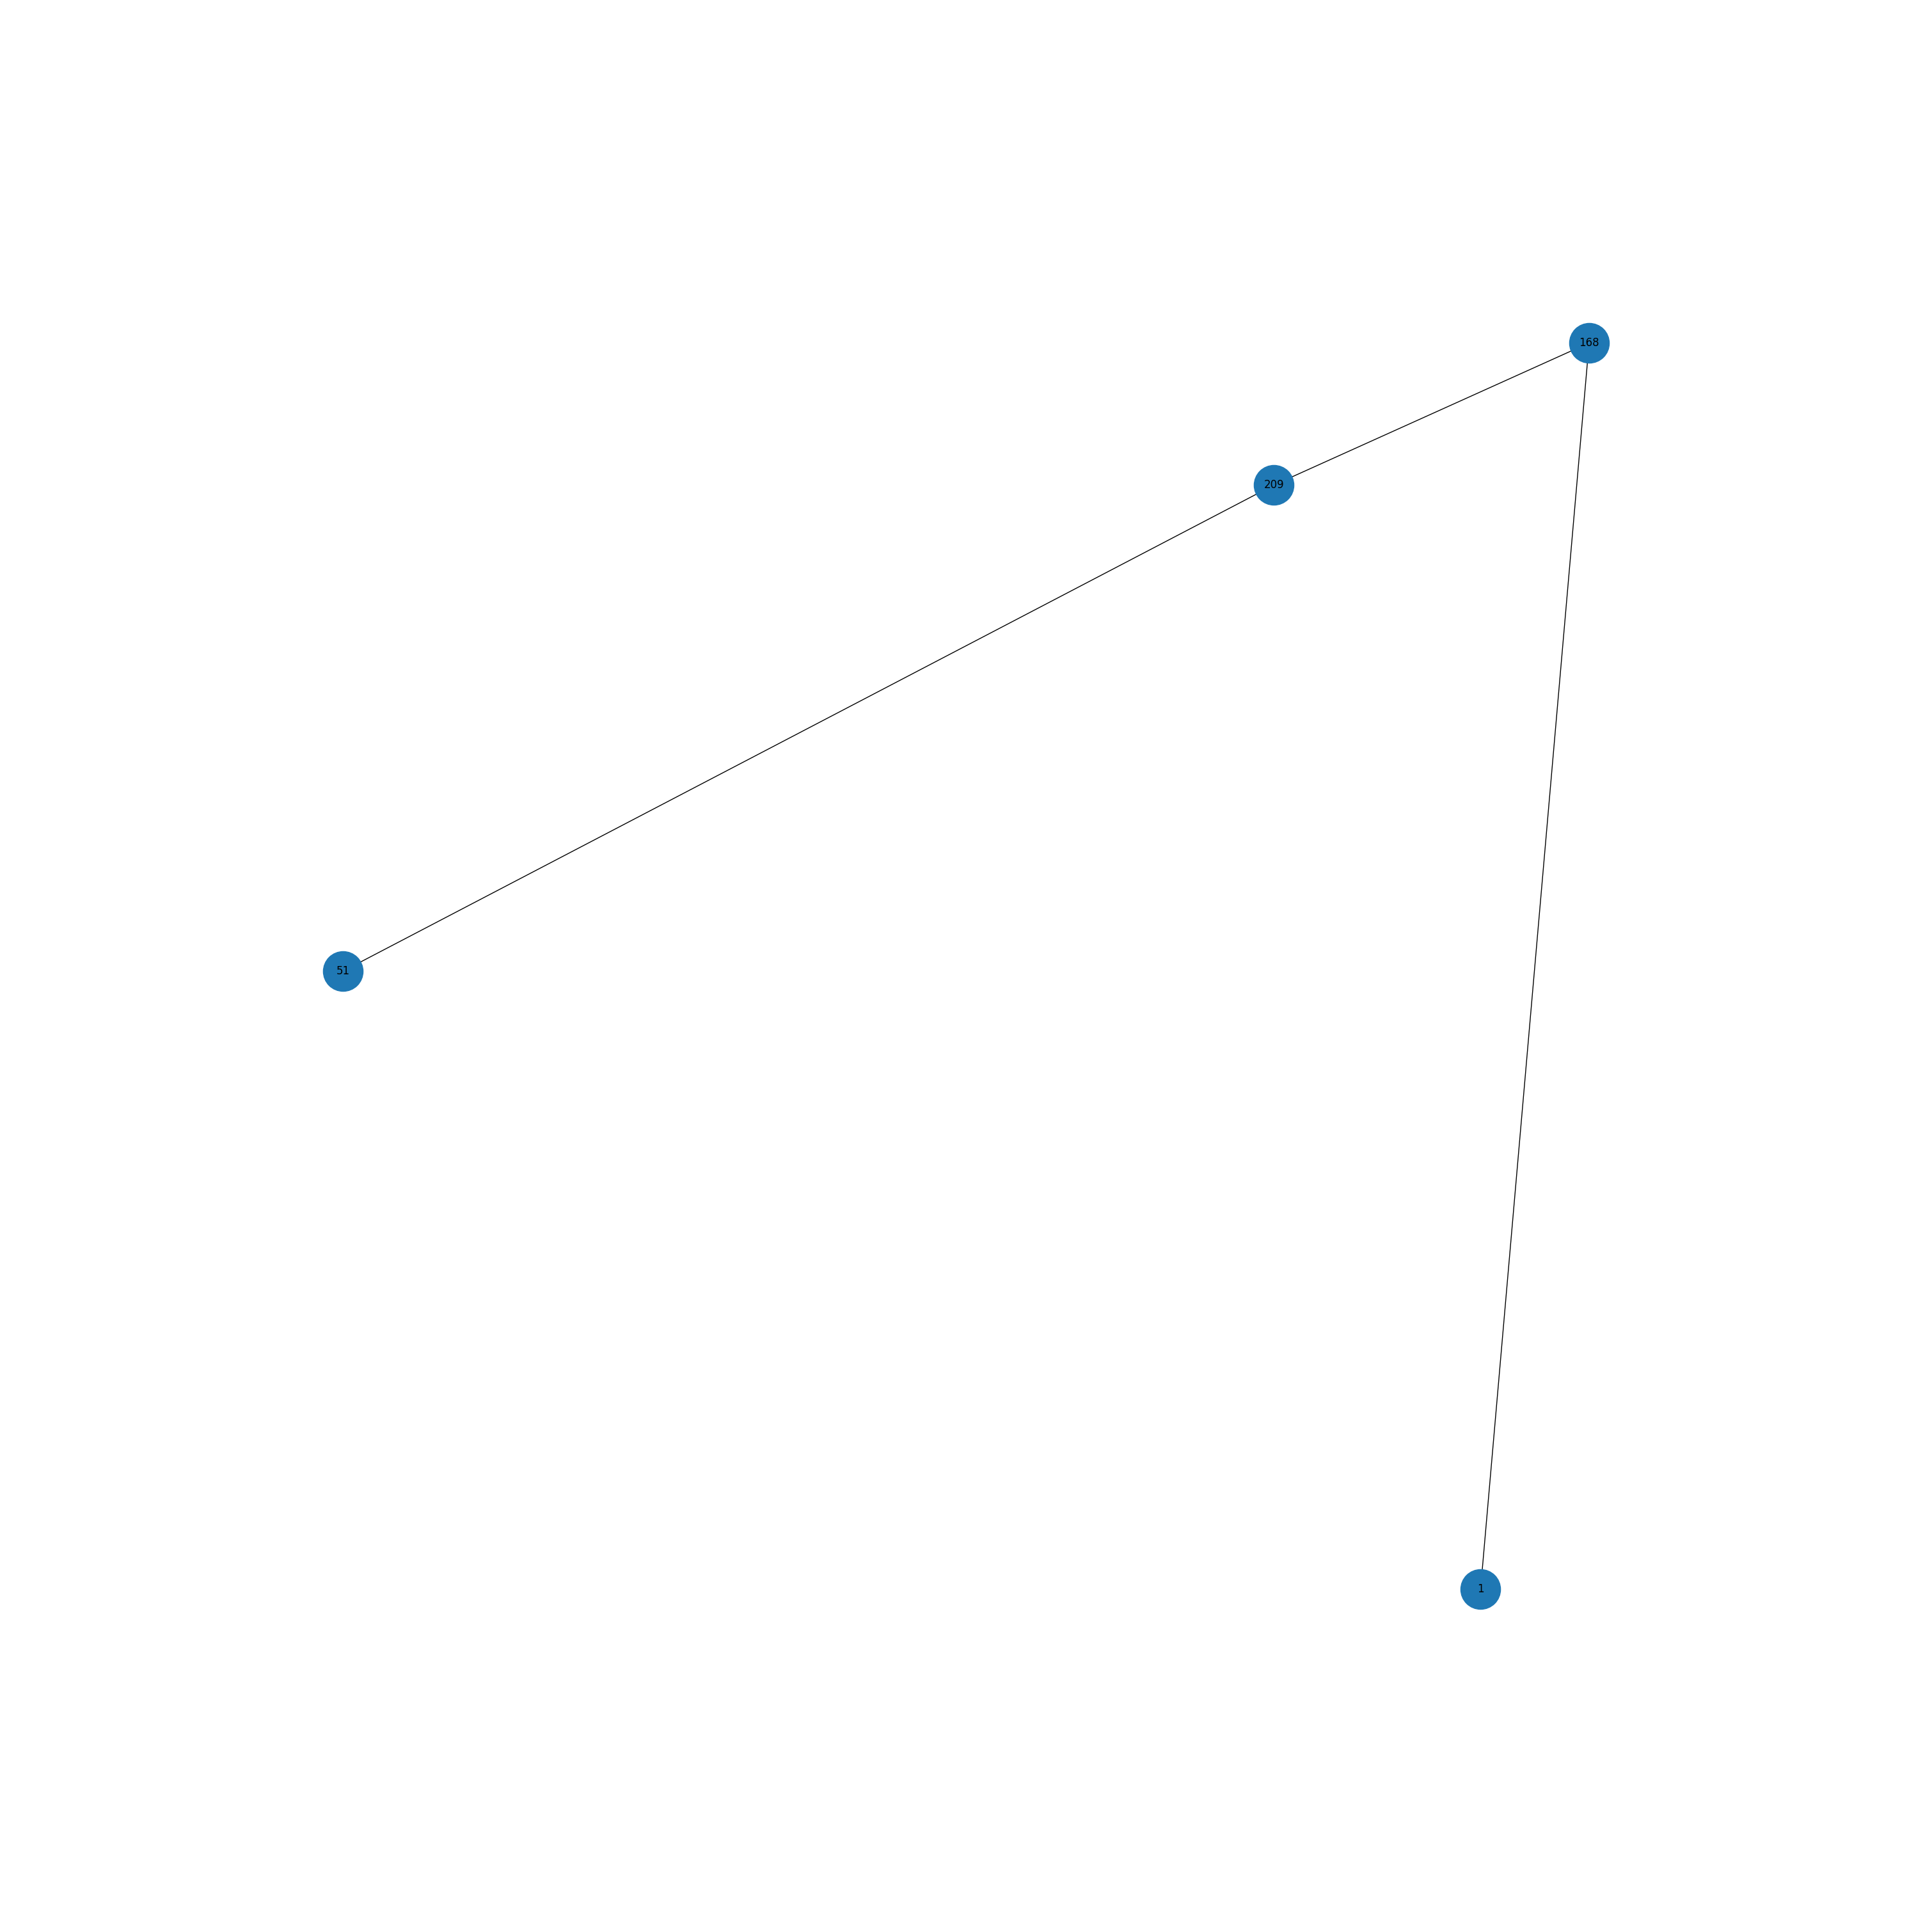

In [10]:
# Code here
total_costs, final_paths = uniform_cost_search(graph, cost, root, list([51]))

Graph1 = nx.Graph()

# you might have to change this depending on your directory
path = "truncated_paths.csv"
with open(path, 'r') as f:
    csvr = csv.reader(f)
    next(csvr, None) # to skip the header row
    for row in csvr:
        # print(row)
        # adding the edges in the graph based on the edges we have in the csv
        Graph1.add_edge(int(row[0]), int(row[1]))

color_map = ['red' if node in final_paths[0] else 'blue' for node in Graph1] 
plt.figure(figsize=(30, 30)) # defining the size of the image (this has been kept large on purpose to make the visualisation clear)
nx.draw(Graph1, pos = locations, with_labels = True ,  node_size = 2000 , node_color=color_map)
# graph = nx.draw_networkx(G,pos, node_color=color_map)
plt.margins(0.2)
plt.show()

Graph2 = nx.Graph()

i=0
while i<(len(final_paths[0])-1):
    Graph2.add_edge(int(final_paths[0][i]), int(final_paths[0][i+1]))
    i +=1

# color_map = ['red' if node == user_id else 'green' for node in G]        
# graph = nx.draw_networkx(G,pos, node_color=color_map)

plt.figure(figsize=(30, 30)) # defining the size of the image (this has been kept large on purpose to make the visualisation clear)
nx.draw(Graph2, pos = locations, with_labels = True , node_size = 2000)
plt.margins(0.2)
plt.show()


## TASK 4 (A* Algorithm)

For this part, we will need to find heursitics as well. As explained in the outline, we will be using Eucedian distances for that and to calculate these, we will use the _locations_ dictionary we made at the start of this project.

In [11]:
def find_heuristic(node, goal):
        val_1 = np.square(locations[goal][0]-locations[node][0]) #x2-x1 whole square
        val_2 = np.square(locations[goal][1]-locations[node][1]) #y2-y1 whole square
        val_3 = val_1 + val_2
        euc_dist = np.sqrt(val_3)
        # print(euc_dist)
        return euc_dist

print(13878.15+find_heuristic(84,142))

13878.192033520114


Now that you have a helper function to find the heursistics, you can use this during your A* function implementation. However, if you instead want to pre calculate every heuristic and pass that as an input to you A* function, although strongly discouraged, you are allowed to do that as well.

#### For the A* algorithm:
You are allowed to use the graph and cost variables that you made in the previous tasks.

If for some reason, there is no path from source node to goal node, your function should return a cost of -1 and an empty list for the path.

The number of goal nodes will be dynamic so your function should cater to that.

You should also keep in mind the case where the source node is given as the goal node, in which case the cost will be zero and the path will be a list with just the source node in it. 

In [12]:
# A* ALGORITHM
# if you want to give any extra variables as inputs, you are free to do so. However, make sure to explain what they represent and why did you need them.

def a_star(graph, cost, root, goals):
    total_costs, final_paths = [], []

    prq=queue.PriorityQueue()

    for goal in goals:

        try: 
            find_heuristic(root,goal) # check if goal can be reached from root node or not
        except: # goal is unreachable
            total_costs.append(-1)
            final_paths.append([])
            continue

        visited=[]
        fathers={}

        node=root

        visited.append(node)
        if(node == goal):
            final_paths.append([node])
            total_costs.append(0)

        for i in graph[node]:
            if(i not in fathers):
                fathers[i]=node
            prq.put((cost[root,i]+find_heuristic(i,goal),i))
            
    
        while(prq.empty() == False ):
            node=prq.get()

            if(node[1] in visited):# dead end
                # total_costs.append(-1)
                # final_paths.append([])
                continue
            else:
                visited.append(node[1]) #add to visited node

                for i in graph[node[1]]: #add children to frontier if any
                    if(i not in fathers):
                        fathers[i]=node[1]
                    prq.put((cost[node[1],i]+node[0]+find_heuristic(i,goal),i))

                if(node[1] == goal): #goal state
                    patht=[]
                    k=node[1]

                    total_cost=0

                    while(k!=root):
                        total_cost+=cost[fathers[k],k]
                        patht.append(fathers[k])
                        k=fathers[k]

                    patht.reverse()
                    patht.append(node[1])
                    final_paths.append(patht)
                    total_costs.append(float(total_cost))
                    while(prq.empty() == False):
                        prq.get()
                    break

    return total_costs, final_paths

In [13]:
root = 1
goals = list([51,22,100,2000,1000,10]) #Your function should work for a dynamic number of
total_costs, final_paths = a_star(graph, cost, root, goals)

for i in range(len(goals)):
    print(f'Total cost for goal node: {goals[i]} is {total_costs[i]} and the path for this cost is: {final_paths[i]}')

Total cost for goal node: 51 is 12389.185687000001 and the path for this cost is: [1, 168, 209, 51]
Total cost for goal node: 22 is 13394.5196 and the path for this cost is: [1, 267, 296, 22]
Total cost for goal node: 100 is 15762.369043 and the path for this cost is: [1, 12, 100]
Total cost for goal node: 2000 is -1 and the path for this cost is: []
Total cost for goal node: 1000 is -1 and the path for this cost is: []
Total cost for goal node: 10 is 7552.388371 and the path for this cost is: [1, 12, 358, 10]


## CONGRATS!! YOU'RE DONE WITH YOUR ASSIGNMENT!